<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/MNISTClassificatoinSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data = datasets.load_digits()

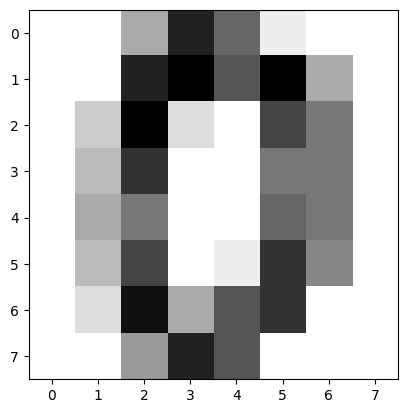

In [3]:
plt.subplot()
plt.imshow(data.images[0], cmap=plt.cm.gray_r)

In [ ]:
data.target[0]

0

In [ ]:
images_and_labels = list(zip(data.images, data.target))

In [ ]:
images_and_labels[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

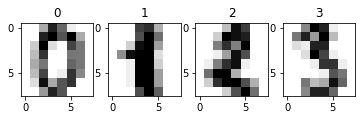

In [ ]:
for i, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)

In [ ]:
np.shape(data.images)

(1797, 8, 8)

In [ ]:
len(data.images)

1797

In [ ]:
X = data.images.reshape((len(data.images), -1))

In [ ]:
np.shape(X)

(1797, 64)

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y = data.target

In [ ]:
len(y)

1797

In [ ]:
from sklearn.svm import SVC
SVC

sklearn.svm._classes.SVC

In [ ]:
svm_classifier = SVC()

In [ ]:
svm_classifier.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

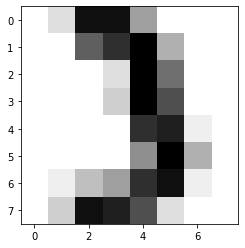

In [ ]:
plt.subplot()
plt.imshow(data.images[190], cmap=plt.cm.gray_r)

In [ ]:
svm_classifier.predict([X[200], X[190]])

array([1, 3])

In [ ]:
u = data.images[190]

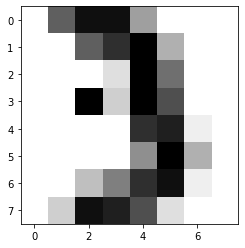

In [ ]:
plt.subplot()
plt.imshow(u, cmap=plt.cm.gray_r)

In [ ]:
u

array([[ 0., 10., 15., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  9.,  0.,  0.],
       [ 0.,  0., 16.,  3., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 16.,  5.,  0.],
       [ 0.,  0.,  4.,  8., 13., 15.,  1.,  0.],
       [ 0.,  3., 15., 14., 11.,  2.,  0.,  0.]])

In [ ]:
u[0, 1] = 10
u[3, 2] = 16
u[6, 3] = 8
u[6, 1] = 0
u

array([[ 0., 10., 15., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  9.,  0.,  0.],
       [ 0.,  0., 16.,  3., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 16.,  5.,  0.],
       [ 0.,  0.,  4.,  8., 13., 15.,  1.,  0.],
       [ 0.,  3., 15., 14., 11.,  2.,  0.,  0.]])

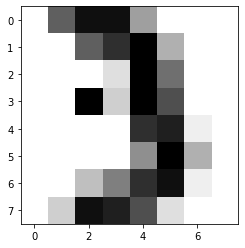

In [ ]:
plt.subplot()
plt.imshow(u, cmap=plt.cm.gray_r)

In [ ]:
u = u.reshape(-1)
u

array([ 0., 10., 15., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 13., 16.,
        5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  9.,  0.,  0.,  0.,  0.,
       16.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13., 14.,  1.,
        0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,  4.,  8.,
       13., 15.,  1.,  0.,  0.,  3., 15., 14., 11.,  2.,  0.,  0.])

In [ ]:
svm_classifier.predict([u])

array([3])

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
svm_new = SVC()
svm_new.fit(X[:1000], y[:1000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_new.predict(X[1000:])

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3,
       7, 3, 3, 4, 6, 6, 6, 9, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6,
       3, 2, 1, 5, 4, 6, 3, 1, 7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6,
       9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0,
       8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 5,
       4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       8, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 9, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,

In [ ]:
y[1000:]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3,
       7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6,
       3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6,
       9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0,
       8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8,
       4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,

In [ ]:
from sklearn import metrics

In [ ]:
p = svm_new.predict(X[1000:])
e = y[1000:]
print(metrics.classification_report(e, p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.97      0.96      0.97        80
           2       1.00      0.97      0.99        77
           3       0.97      0.85      0.91        79
           4       0.99      0.95      0.97        83
           5       0.92      0.99      0.95        82
           6       0.99      0.99      0.99        80
           7       0.94      0.99      0.96        80
           8       0.92      0.96      0.94        76
           9       0.92      0.95      0.93        81

    accuracy                           0.96       797
   macro avg       0.96      0.96      0.96       797
weighted avg       0.96      0.96      0.96       797



In [ ]:
print(metrics.confusion_matrix(e, p))

[[78  0  0  0  1  0  0  0  0  0]
 [ 0 77  0  0  0  0  0  0  1  2]
 [ 1  0 75  1  0  0  0  0  0  0]
 [ 0  0  0 67  0  3  0  4  5  0]
 [ 0  0  0  0 79  0  0  0  0  4]
 [ 0  0  0  0  0 81  1  0  0  0]
 [ 0  1  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  1  0 79  0  0]
 [ 0  1  0  0  0  1  0  0 73  1]
 [ 0  0  0  1  0  2  0  1  0 77]]
